Importing Libraries

In [23]:
%matplotlib inline
from sklearn.cluster import AffinityPropagation, KMeans, DBSCAN, SpectralClustering
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import logm, expm

Change working directly and check the files

In [24]:
import os

os.chdir("/Users/toshihikooki/Documents/20161110_R")

cwd = os.getcwd()

os.listdir(cwd)

['.DS_Store',
 '.Rapp.history',
 '.RData',
 '.Rhistory',
 '20161110.docx',
 '20161110.R',
 '20161110_2.R',
 'edgeR_tagwise_001_output.txt',
 'edgeR_tagwise_05_output.txt',
 'edgeR_tagwise_1e_06_output.txt',
 'Est_Dispersions_Plot.pdf',
 'NT_low_high_all.csv',
 'NT_low_high_day1.csv',
 'NT_TX_day3.csv',
 'NT_TX_day3.txt',
 'NT_TX_day3_counts.csv',
 'NT_TX_day3_counts.txt',
 'Smear_Plot.pdf',
 'TNBC10vNormal10_count_2.csv',
 'TNBC10vNormal10_count_2.txt',
 'TNBC10vNormal10_Counts_2.csv',
 'TNBC10vNormal10_Counts_3.csv',
 'TNBC10vNormal10_Counts_4.csv',
 'TNBC10vNormal10_cpm_2.csv',
 'TNBC10vNormal10_cpm_2.txt',
 'TNBC10vNormal10_Raw_2.txt']

In [33]:
df_wine = pd.read_csv("TNBC10vNormal10_cpm_2.csv", sep=",", header=None)
print(df_wine.head())
df_wine_2 = df_wine.T
df_wine_2 = pd.DataFrame(df_wine_2)
#print(df_wine_2)

X,Y = df_wine_2.iloc[1:, 1:].values, df_wine.iloc[0,1:]

print(X)
print(Y)

     0            1            2            3            4            5   \
0  Gene        TNBC1        TNBC2        TNBC3        TNBC4        TNBC5   
1   NA4  12.41899146  7.435149585  3.261578821  19.93036137  7.273773256   
2   NA5  74.65835566  50.34215865  88.54227211  91.70479123  66.15440577   
3   NA7  6.570512925  5.537637452  54.55150459  12.98850186  6.647554367   
4  NA20   70.6390309  98.96106648  6.459205116  11.57500105  87.36556355   

            6            7            8            9      ...       \
0        TNBC6        TNBC7        TNBC8        TNBC9     ...        
1  7.055225336  17.68349188  17.09683532  13.76116324     ...        
2  63.94478675  93.17069463  80.24171772  87.70600304     ...        
3  3.763593618  2.531416449  11.26593717  3.326090285     ...        
4  191.2050777   19.9417339  45.53450008  16.20219946     ...        

            11           12           13           14           15  \
0      Normal1      Normal2      Normal3      Normal

In [34]:
# Use multi-dimensional scaling (MDS) to get a 2-D plane representation of the data, so that we can plot it.
mds = MDS()
mds_coords = mds.fit_transform(X)

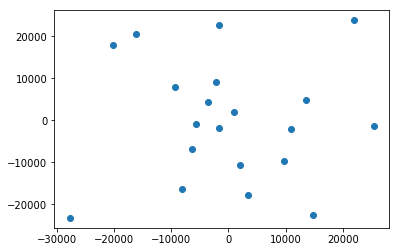

In [35]:
plt.scatter(mds_coords[:,0], mds_coords[:,1])

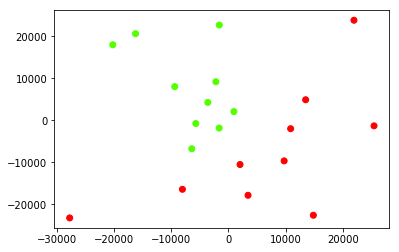

In [36]:
# Colour the clusters by cluster number, then plot on MDS plot.

pre_cluster_lables = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,])
                            
#pre_cluster_lables

cmap = plt.cm.get_cmap('prism', len(pre_cluster_lables))

plt.scatter(mds_coords[:,0], mds_coords[:,1], c=pre_cluster_lables, cmap=cmap)

In [37]:
ap = AffinityPropagation()
ap_cluster_labels = ap.fit_predict(X)  # gets the cluster labels.
ap_cluster_labels

array([3, 0, 1, 3, 2, 5, 3, 3, 3, 4, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6])

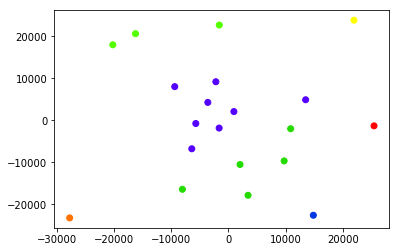

In [38]:
# Colour the clusters by cluster number, then plot on MDS plot.
len(ap_cluster_labels)

cmap = plt.cm.get_cmap('prism', len(ap_cluster_labels))

plt.scatter(mds_coords[:,0], mds_coords[:,1], c=ap_cluster_labels, cmap=cmap)

In [39]:
#Evaluating clustering results
#One metric for evaluating clustering results, which is provided by the scikit-learn API, is the silhouette_score.
#. The score can take on values between -1 and 1, with -1 being the worst, and +1 being the best scores. 0 indicates overlapping clusters.
#Chalkboard example: three blobs
silhouette_score(X, ap_cluster_labels)

0.17021902491149263

In [40]:
km = KMeans(n_clusters=2)
km_cluster_labels = km.fit_predict(X)
km_cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1],
      dtype=int32)

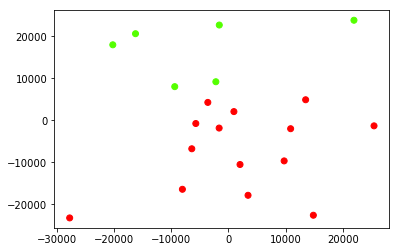

In [41]:
cmap = plt.cm.get_cmap('prism', len(km_cluster_labels))

plt.scatter(mds_coords[:,0], mds_coords[:,1], c=km_cluster_labels, cmap=cmap)

In [42]:
silhouette_score(X, km_cluster_labels)

0.20300026871531576

In [43]:
spc = SpectralClustering()
spc_cluster_labels = spc.fit_predict(X)
spc_cluster_labels[0:5]

array([0, 6, 1, 1, 0], dtype=int32)

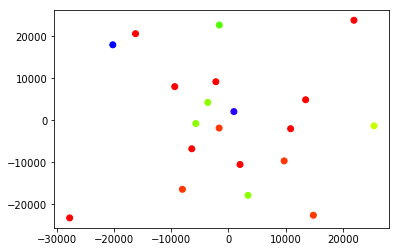

In [44]:
cmap = plt.cm.get_cmap('prism', len(spc_cluster_labels))

plt.scatter(mds_coords[:,0], mds_coords[:,1], c=spc_cluster_labels, cmap=cmap)

In [45]:
silhouette_score(X, spc_cluster_labels)

-0.24387860848170448

In [46]:
ISO = Isomap()
ISO_coords = ISO.fit_transform(X)

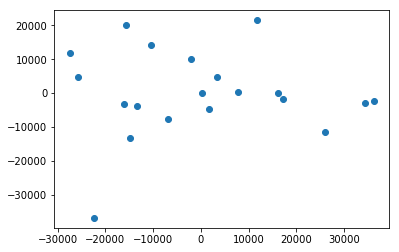

In [47]:
plt.scatter(ISO_coords[:,0], ISO_coords[:,1])

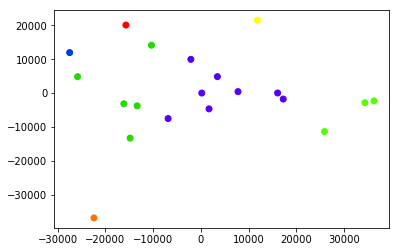

In [48]:
cmap = plt.cm.get_cmap('prism', len(ap_cluster_labels))

plt.scatter(ISO_coords[:,0], ISO_coords[:,1], c=ap_cluster_labels, cmap=cmap)

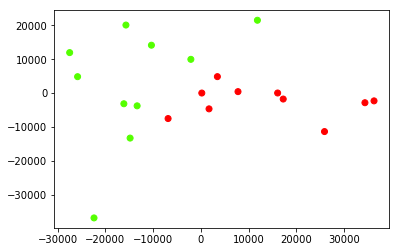

In [49]:
# Colour the clusters by cluster number, then plot on MDS plot.

pre_cluster_lables = np.array([1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])
                            
#pre_cluster_lables

cmap = plt.cm.get_cmap('prism', len(pre_cluster_lables))


#cmap = plt.cm.get_cmap('gnuplot2', len(ap_cluster_labels))

plt.scatter(ISO_coords[:,0], ISO_coords[:,1], c=pre_cluster_lables, cmap=cmap)

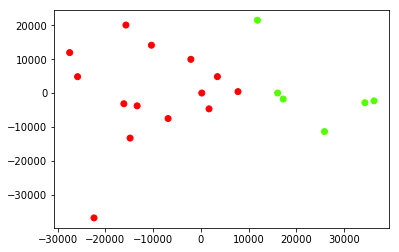

In [52]:
cmap = plt.cm.get_cmap('prism', len(km_cluster_labels))

plt.scatter(ISO_coords[:,0], ISO_coords[:,1], c=km_cluster_labels, cmap=cmap)

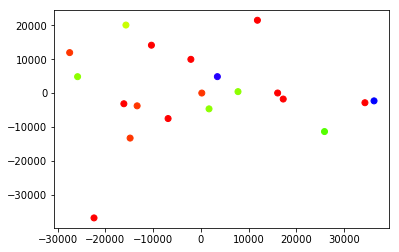

In [53]:
cmap = plt.cm.get_cmap('prism', len(spc_cluster_labels))

plt.scatter(ISO_coords[:,0], ISO_coords[:,1], c=spc_cluster_labels, cmap=cmap)